**AUTHOR**- Prakash Kumar Singh

**Intern at Sparks Foundation GRIP**

**Domain**- Data Science And Business Analytics

**Task 1**- Prediction Using Supervised ML

*in this task i have to build a linear regression model which will predict scores of the student based on their study hours*

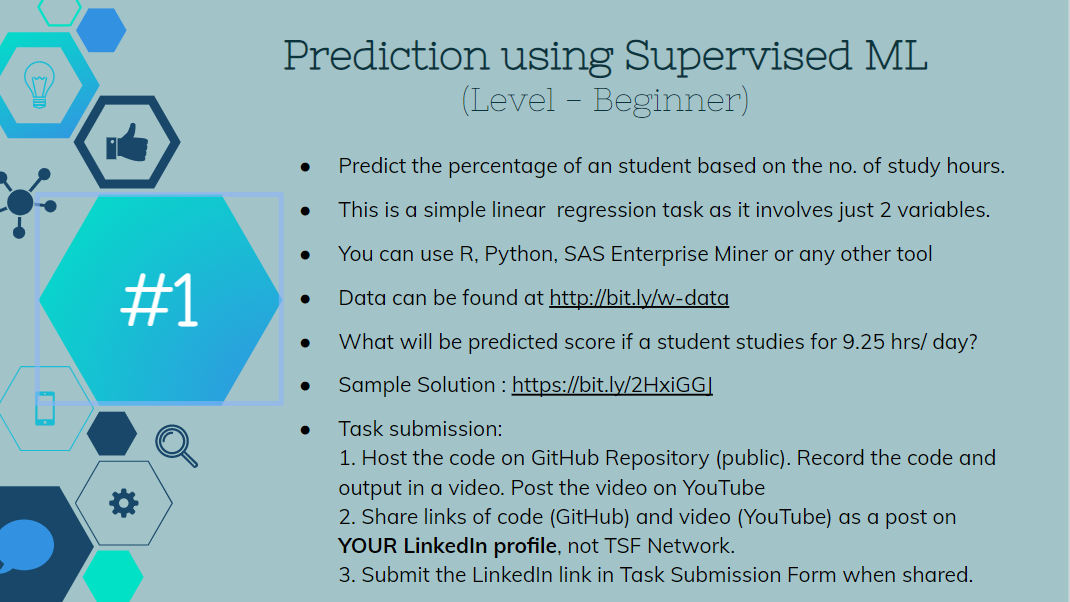

In [1]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data preperation

In [3]:
#separting data into independent and dependent variable
df_features = df.iloc[:, :-1].values  
df_target= df.iloc[:, 1].values  

In [4]:
#splitting data into train and test subset
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=0) 
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (20, 1)
y_train (20,)
x_test (5, 1)
y_test (5,)


# model building

In [5]:
#fiiting the model using sklearn LinearRegression
linreg = LinearRegression()  
linreg.fit(x_train, y_train) 

LinearRegression()

In [6]:
y_train_pred=linreg.predict(x_train)
y_test_pred=linreg.predict(x_test)

**building the model using ols method**

In [7]:
#adding constant 
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [8]:
#using ols method to fit the model
slr_model=sm.OLS(y_train,x_train).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.79e-13
Time:                        12:56:26   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.5

**Interpretation:** The R-squared value obtained from this model is 95.2 which means that the above model explains 95.2%
    of the variation in the Scores. 

**The `Durbin-Watson` test is used to check the autocorrelation between the residuals.**

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.813) 
which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is greater than 0.05; 
that implies the residuals are not normally distributed.

The 'Cond. No' (= 1) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

In [9]:
#here all the assumption of the linear regression model is satisfied.

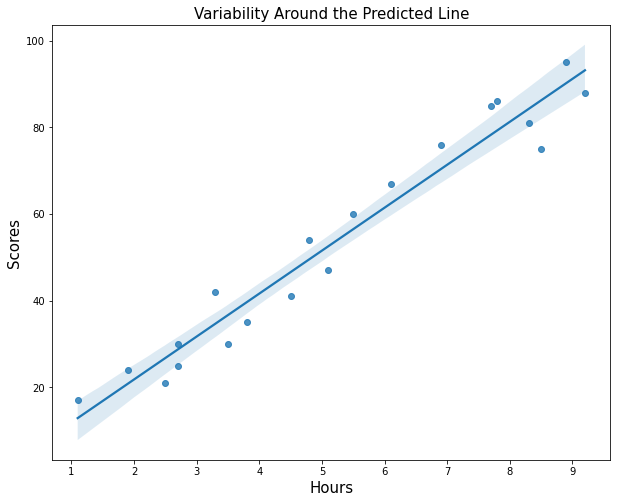

In [10]:
#plotting regression line or best fit line.
import seaborn as sns
plt.figure(figsize = (10,8))
sns.regplot(x = x_train[:,1], y = y_train)
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

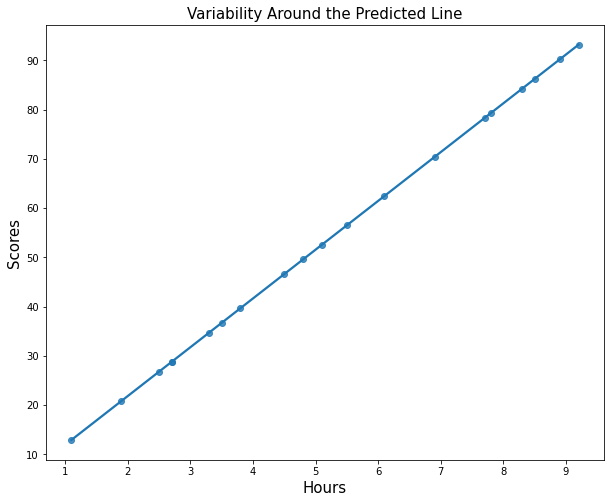

In [16]:
#plotting regression line or best fit line.
import seaborn as sns
plt.figure(figsize = (10,8))
sns.regplot(x = x_train[:,1], y = y_train_pred)
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

# making prediction

In [11]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# what will be the predicted score if a student study 9.25/hours a day?

In [12]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# model evaluation

In [13]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
print('train rmse:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('test rmse:',np.sqrt(mean_squared_error(y_test,y_test_pred)))


train rmse: 5.558613350226342
test rmse: 4.6474476121003665
